In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet2d',
           discriminator='cnnplus',
           filter_num=[16, 32, 64, 128, 256, 512],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           output_activation='Sigmoid',
           batch_norm=True,
           pool=True,
           unpool=False,
           weights='imagenet',
           optimizer=None, # default is optimizers.Adam(learning_rate=1e-3)
           loss=None, # default is losses.binary_crossentropy
           metric=None # default is Util.dice_coef           
          )

*** GP2  KUNet2D ***
Working directory: /tmp/tmpbdi21j2oGP2
Using  discriminator (CNN+)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

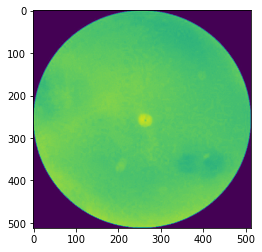

In [5]:
imshow(images[0])

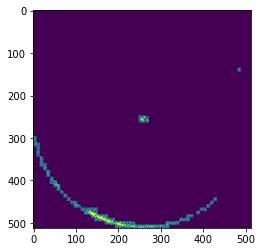

In [6]:
imshow(masks[0])

In [7]:
images = images[:6392]

In [8]:
masks = masks[:6392]

In [9]:
images.shape

(6392, 512, 512, 1)

In [10]:
masks.shape

(6392, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [12]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 29s 4s/step - loss: 0.6028 - dice_coeff: 0.4876 - val_loss: 0.7091 - val_dice_coeff: 0.2999
Epoch 2/100
5/5 [==============================] - 6s 1s/step - loss: 0.3896 - dice_coeff: 0.5939 - val_loss: 1.0851 - val_dice_coeff: 0.3540
Epoch 3/100
5/5 [==============================] - 6s 1s/step - loss: 0.3493 - dice_coeff: 0.6273 - val_loss: 1.7719 - val_dice_coeff: 0.3523
Epoch 4/100
5/5 [==============================] - 6s 1s/step - loss: 0.3327 - dice_coeff: 0.6376 - val_loss: 3.8757 - val_dice_coeff: 0.2736
Epoch 5/100
5/5 [==============================] - 6s 1s/step - loss: 0.3208 - dice_coeff: 0.6381 - val_loss: 8.0758 - val_dice_coeff: 0.2778
Epoch 6/100
5/5 [==============================] - 6s 1s/step - loss: 0.3114 - dice_coeff: 0.6470 - val_loss: 11.3928 - val_dice_coeff: 0.3180
Epoch 7/100
5/5 [==============================] - 6s 1s/step - loss: 0.3030 - dice_coeff: 0.6500 - val_loss: 11.0311 - 

In [13]:
R.classifier_scores

[[10.749713897705078, 0.317985475063324],
 [8.649930953979492, 0.3318357765674591],
 [0.6887458562850952, 0.10066071152687073],
 [0.6887469291687012, 0.12203919887542725],
 [0.3724247217178345, 0.4196813702583313],
 [0.2675272226333618, 0.5824756622314453],
 [0.28877583146095276, 0.5868391394615173],
 [0.649007260799408, 0.4851227104663849]]

In [14]:
R.discriminator_scores

[[0.0002451690670568496, 1.0],
 [1.4255212477110035e-07, 1.0],
 [0.0613168329000473, 0.997389018535614],
 [0.055580105632543564, 1.0],
 [0.07195781916379929, 1.0],
 [0.07379303872585297, 1.0],
 [0.06645801663398743, 1.0],
 [0.0066640242002904415, 1.0]]

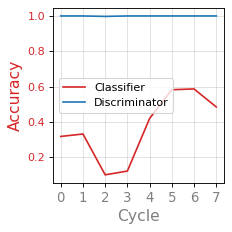

In [15]:
R.plot()